# Project#4 - Wrangle and Analyze Data
> **Developed By**: Rakan210 on June 17, 2019 - as psrt of Udacity Data Analyst Nanodegree program (DAND)

### Project Steps
1. **Gathering data**
2. **Assessing data**
3. **Cleaning data**

### Part#1: Gathering Data:- 
This projet required 3 source of data to be gathered: 
* The WeRateDogs Twitter archive, which is provided in the following link: [ [twitter_archive_enhanced.csv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv) ].
* The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following [ URL ](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv).
* Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called `tweet_json.txt` file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [132]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**1. Reading WeRateDogs Twitter archive Data**

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv', encoding = 'utf-8')

**2. Obtaining Image Predictions Data Through a URL**

In [3]:
# download tsv using Requests Liburary and write it to a file
with open('image_predictions.tsv', 'wb') as file:
    file.write(requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
.content)

# Converting (TSV) file to Pandas Dataframe: 
df_images = pd.read_csv('image_predictions.tsv', sep='\t', encoding = 'utf-8')

**3. Obtaining Other Tweets Data Through Twitter APIs**

In [4]:
# Initiating the required keys for Twitter API
consumer_key = 'LzFMckBn32a2NCDKPOaLJEfiV'
consumer_secret = 'BTsilq6PnYYbDSNx47y7LSvg4pBAi0ke3sY2eZm1TLOx2RSXmo'
access_token = '433095012-ha6nyKGKJAr6zxPoZoIYSu50bYQTgtPgtTPpgt2T'
access_secret = 'DRtdW6Op1C9puYNUXO8eRpqX5pMOuZOdlr3kqU3h71xEz'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler = auth, wait_on_rate_limit = True,wait_on_rate_limit_notify = True)

In [5]:
# This list holds all required infor for each tweet:
collected_tweet = []

# This list holds all tweet ids in case of API error, along witht the error message: 
collected_error = []

# Quick timer to estimate processing time:  
start_time = time.time() 

index = 0

print('\n\n ===| Start processing Twitter API Data |===\n\n')
print('### Tweets with errors ###')

# The API will bw used now to query and write the result in a JSON file: 
with open('tweet_json.txt','a',encoding = 'utf8') as file:
    for tweet_id in df_archive.tweet_id:
        try:
            index = index + 1
            # Get all tweet info with "Extended" mode:
            tweet_info = api.get_status(tweet_id, tweet_mode = 'extended')
            
            # Dump tweet info as a JSON object in "tweet_json.txt" (required step):
            json.dump(tweet_info._json, file)
            file.write('\n')
            
            # Dump selective info about each tweet:
            collected_tweet.append({ 'tweet_id' : int(tweet_id),
                                     'favorites': int(tweet_info._json['favorite_count']),
                                     'retweets' : int(tweet_info._json['retweet_count']),
                                     'date_time': pd.to_datetime(tweet_info._json['created_at'])})
            
        # Handling expected errors:   
        except Exception as e:
            collected_error.append(tweet_id)
            print(index ,' - Tweet with ID [', tweet_id ,'] has an error: ' , str(e))
            

print('\n\n ===| The estimated processing time is: [' , round((time.time() - start_time)/60,2) , '] mins |===')



 ===| Start processing Twitter API Data |===
### Tweets with errors ###
20  - Tweet with ID [ 888202515573088257 ] has an error:  [{'code': 144, 'message': 'No status found with that ID.'}]
96  - Tweet with ID [ 873697596434513921 ] has an error:  [{'code': 144, 'message': 'No status found with that ID.'}]
102  - Tweet with ID [ 872668790621863937 ] has an error:  [{'code': 144, 'message': 'No status found with that ID.'}]
105  - Tweet with ID [ 872261713294495745 ] has an error:  [{'code': 144, 'message': 'No status found with that ID.'}]
119  - Tweet with ID [ 869988702071779329 ] has an error:  [{'code': 144, 'message': 'No status found with that ID.'}]
133  - Tweet with ID [ 866816280283807744 ] has an error:  [{'code': 144, 'message': 'No status found with that ID.'}]
156  - Tweet with ID [ 861769973181624320 ] has an error:  [{'code': 144, 'message': 'No status found with that ID.'}]
183  - Tweet with ID [ 856602993587888130 ] has an error:  [{'code': 144, 'message': 'No status

In [6]:
# Converting collected tweets to a DataFrame and save it as a CSV file:
df_collected_tweet = pd.DataFrame(collected_tweet, columns = ['tweet_id', 'favorites', 'retweets', 'date_time'])
df_collected_tweet.to_csv('tweet_json_cleaned.txt', encoding = 'utf-8', index=False)

### Part#2: Assessing Data:- 

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. 

### Quality  issues: (completeness, validity, accuracy, and consistency issues)

* All 'None' values should be changed to NP.NaN.
* Delete all Retweets/Replys records since they shouldn't be considered. ([retweeted_status*] & [in_reply_to*] columns)
* Delete all records that missing values in [expanded_url] column as they indicate ratings without an image.
* Delete all records that have inaccurate value in [rating_denominator] as it should fixed to "10".
* Delete all records that have extreme rates in [rating_numerator] column ( i.e. 0 & >20), as the over all rating value should not exceed "10".
* Replace invalid dogs' names with NP.NaN.
* Rename column labels to a descriptive ones.
* Not all tweets have predictions photo (Archive Tweets "df_archive": 2356 rows , Predection Images "df_images": 2075 rows), so only tweet with images will be considered. 
* Insert NumPy.NaN to indicate Null values.

### Tidiness issues: (structural issues)
**df_archive:**
* Remove unrequired columns for the analysis.
* Combine dog stages (doggo, floofer, pupper and puppo) into one column called [dog_stage].
* Combine rating columns into one column called [dog_rating]

**df_master:**
* Combine all DataFrames into one master DataFrame called [df_master]. Its content should be stored in `twitter_archive_master.csv`.



##### Note: Bold columns will be marged in the master dataframe

**#df_archive:**
* **tweet_id**                      - Required for Analysis
* in_reply_to_status_id         - Required for Clean up
* in_reply_to_user_id           - Required for Clean up
* timestamp                     - Not required
* source                        - Not required
* text                          - Not required
* retweeted_status_id           - Required for Clean up
* retweeted_status_user_id      - Required for Clean up
* retweeted_status_timestamp    - Required for Clean up
* expanded_urls                 - Required for Clean up
* **rating_numerator**              - Required for Anaysis & Clean up 
* **rating_denominator**            - Required for Anaysis & Clean up 
* **name**                          - Required for Anaysis & Clean up 
* doggo                         - Required for Anaysis & Clean up 
* floofer                       - Required for Anaysis & Clean up 
* pupper                        - Required for Anaysis & Clean up 
* puppo                         - Required for Anaysis & Clean up 


**#df_images:**
* **tweet_id**    - Required for Anaysis 
* **jpg_url**     - Required for Anaysis 
* **img_num**     - Required for Anaysis 
* **p1**          - Required for Anaysis 
* **p1_conf**     - Required for Anaysis 
* p1_dog      - Not required
* p2          - Not required
* p2_conf     - Not required
* p2_dog      - Not required
* p3          - Not required
* p3_conf     - Not required
* p3_dog      - Not required



**#df_collected_tweet:**
* **tweet_id**     - Required for Anaysis 
* **favorites**    - Required for Anaysis 
* **retweets**     - Required for Anaysis 
* **date_time**    - Required for Anaysis 


### Part#3: Cleaning Data:- 

In [86]:
# Copying DataFrames for Clean-up Process:
df_archive_clean = df_archive.copy()
df_images_clean = df_images.copy()

In [87]:
# Tweet Counter: will be used to demonstrate changes:
tweets_count = df_archive_clean.shape[0]

print('\n===| Summary of Cleaning Data Stage |===\n')

#### Cleaing Data for df_archive_clean ###

# 1. Replace all 'None' strings with NP.NaN:
df_archive_clean.replace('None', np.nan, inplace=True)

print("#1# All 'None' values has been changed to NP.NaN")

    
# 2. Drop all Replys and Retweets records:
df_archive_clean.drop(df_archive_clean[df_archive_clean.retweeted_status_user_id.notnull()].index, inplace=True)
df_archive_clean.drop(df_archive_clean[df_archive_clean.in_reply_to_user_id.notnull()].index, inplace=True)

print('#2# Deleted Records: ' , tweets_count - df_archive_clean.shape[0] , '\t->  Reason: Retweets/Replys')
tweets_count = df_archive_clean.shape[0]


# 3. Drop all tweets that missing values in [expanded_url] as they indicate ratings without an image:
df_archive_clean.drop(df_archive_clean[df_archive_clean.expanded_urls.isnull()].index, inplace=True)

print('#3# Deleted Records: ' , tweets_count - df_archive_clean.shape[0] , '\t->  Reason: Ratings without an image')
tweets_count = df_archive_clean.shape[0]


# 4. Drop all tweets with inaccurate value in [rating_denominator]:
df_archive_clean.drop(df_archive_clean[df_archive_clean.rating_denominator != 10].index, inplace=True)

print('#4# Deleted Records: ' , tweets_count - df_archive_clean.shape[0] , '\t->  Reason: Inaccurate Rating (denominator)')
tweets_count = df_archive_clean.shape[0]


# 5. Drop all tweets with inaccurate value in [rating_numerator]:
df_archive_clean.drop(df_archive_clean[df_archive_clean.rating_numerator == 0].index, inplace=True)
df_archive_clean.drop(df_archive_clean[df_archive_clean.rating_numerator > 20].index, inplace=True)


print('#5# Deleted Records: ' , tweets_count - df_archive_clean.shape[0] , '\t->  Reason: Inaccurate Rating (numerator)')
tweets_count = df_archive_clean.shape[0]


# 6. Marge ratings columns into one column called [dog_rating]:
df_archive_clean['dog_rate'] = df_archive_clean.rating_numerator / df_archive_clean.rating_denominator
print ("#6# [dog_rate] column has been created contains calculated dog's rating")


# 7. Replace invalid names for dogs with NP.NaN:
names=['a','the','an','not','one','Mo','O','Al','my','his','this','all']
df_archive_clean.replace(names, np.nan, inplace=True)
print ("#7# Invalid dogs' names {'a','the','an','not','one','Mo','O','Al','my','his','this','all'} were replaced with NP.NaN")


# 8. Merge dog stages into one column called [dog_stage]: 'doggo','floofer','pupper','puppo'
df_archive_clean.loc[df_archive_clean.doggo   == 'doggo'  , 'dog_stage'] = 'doggo'
df_archive_clean.loc[df_archive_clean.floofer == 'floofer', 'dog_stage'] = 'floofer'
df_archive_clean.loc[df_archive_clean.pupper  == 'pupper' , 'dog_stage'] = 'pupper'
df_archive_clean.loc[df_archive_clean.puppo   == 'puppo'  , 'dog_stage'] = 'puppo'
print ("#8# [dog_stage] column has been created contains value of 'doggo','floofer','pupper','puppo' columns" )


# 9. Drop unrequired columns:
columns = ['timestamp','source','text','rating_numerator','rating_denominator','in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 
           'retweeted_status_user_id','expanded_urls','retweeted_status_timestamp','doggo','floofer','pupper','puppo']
df_archive_clean.drop(columns,axis=1,inplace=True)

print ('#9# Unrequired columns in [df_archive_clean] have been deleted (listed above)')




#### Cleaing Data for df_images_clean ###

# 10. Drop unrequired columns:
columns = ['p1_dog','p2','p2_conf','p2_dog', 'p3','p3_conf', 'p3_dog']
df_images_clean.drop(columns,axis=1,inplace=True)
print ('#10# Unrequired columns in [df_images_clean] have been deleted (listed above)')




#### Cleaing Data for df_master ###

# 11. Create a new DataFrame that combineds all DataFrames (df_archive_clean, df_images_clean, collected_tweet):
df_master = pd.merge(df_collected_tweet, df_archive_clean, on='tweet_id', how='inner')
df_master = pd.merge(df_master, df_images_clean, on='tweet_id', how='inner')
df_master = df_master[['date_time','tweet_id','favorites','retweets','name','dog_rate','dog_stage','jpg_url','img_num','p1','p1_conf']]
print ('#11# Combined all DataFrames into Master one called [df_master]')

# 12. Rename df_master's column labels to a descriptive ones:
df_master.rename(columns={'date_time': 'time_stamp',
                          'name': 'dog_name',
                          'jpg_url': 'image_url',
                          'img_num': 'images_count',
                          'p1': 'img_prediction',
                          'p1_conf': 'prediction_conf',
                          }, inplace=True)

print ("#12# Renamed [df_master]'s column labels to a descriptive ones")


# 13. Save to df_master a CSV file:
df_master.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

print ("#13# Saved [df_master] to a CSV file called 'twitter_archive_master.csv'")


===| Summary of Cleaning Data Stage |===

#1# All 'None' values has been changed to NP.NaN
#2# Deleted Records:  259 	->  Reason: Retweets/Replys
#3# Deleted Records:  3 	->  Reason: Ratings without an image
#4# Deleted Records:  17 	->  Reason: Inaccurate Rating (denominator)
#5# Deleted Records:  6 	->  Reason: Inaccurate Rating (numerator)
#6# [dog_rate] column has been created contains calculated dog's rating
#7# Invalid dogs' names {'a','the','an','not','one','Mo','O','Al','my','his','this','all'} were replaced with NP.NaN
#8# [dog_stage] column has been created contains value of 'doggo','floofer','pupper','puppo' columns
#9# Unrequired columns in [df_archive_clean] have been deleted (listed above)
#10# Unrequired columns in [df_images_clean] have been deleted (listed above)
#11# Combined all DataFrames into Master one called [df_master]
#12# Renamed [df_master]'s column labels to a descriptive ones
#13# Saved [df_master] to a CSV file called 'twitter_archive_master.csv'


In [88]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 4 columns):
tweet_id     2071 non-null int64
name         1406 non-null object
dog_rate     2071 non-null float64
dog_stage    334 non-null category
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 66.9+ KB


In [89]:
df_archive_clean.head()

,tweet_id,name,dog_rate,dog_stage
0,892420643555336193,Phineas,1.3,NaN
1,892177421306343426,Tilly,1.3,NaN
2,891815181378084864,Archie,1.2,NaN
3,891689557279858688,Darla,1.3,NaN
4,891327558926688256,Franklin,1.2,NaN


In [90]:
df_images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.1+ KB


In [91]:
df_images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


In [92]:
df_collected_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 4 columns):
tweet_id     2335 non-null int64
favorites    2335 non-null int64
retweets     2335 non-null int64
date_time    2335 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 73.0 KB


In [93]:
df_collected_tweet.head()

,tweet_id,favorites,retweets,date_time
0,892420643555336193,37466,8155,2017-08-01 16:23:56
1,892177421306343426,32196,6036,2017-08-01 00:17:27
2,891815181378084864,24271,3995,2017-07-31 00:18:03
3,891689557279858688,40773,8310,2017-07-30 15:58:51
4,891327558926688256,38998,9002,2017-07-29 16:00:24


In [94]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1943 entries, 0 to 1942
Data columns (total 11 columns):
time_stamp         1943 non-null datetime64[ns]
tweet_id           1943 non-null int64
favorites          1943 non-null int64
retweets           1943 non-null int64
dog_name           1356 non-null object
dog_rate           1943 non-null float64
dog_stage          301 non-null category
image_url          1943 non-null object
images_count       1943 non-null int64
img_prediction     1943 non-null object
prediction_conf    1943 non-null float64
dtypes: category(1), datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 169.1+ KB


In [95]:
df_master.head()

,time_stamp,tweet_id,favorites,retweets,dog_name,dog_rate,dog_stage,image_url,images_count,img_prediction,prediction_conf
0,2017-08-01 16:23:56,892420643555336193,37466,8155,Phineas,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049
1,2017-08-01 00:17:27,892177421306343426,32196,6036,Tilly,1.3,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581
2,2017-07-31 00:18:03,891815181378084864,24271,3995,Archie,1.2,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
3,2017-07-30 15:58:51,891689557279858688,40773,8310,Darla,1.3,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278
4,2017-07-29 16:00:24,891327558926688256,38998,9002,Franklin,1.2,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712


## Project's Analyzing and Visualizing  

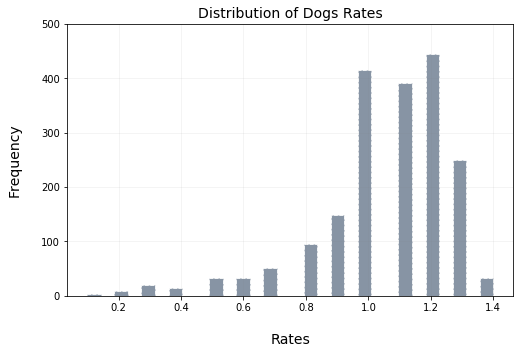

In [114]:
rate_graph  = df_master.dog_rate.plot.hist(bins=30, color='#697a8e', alpha=0.8, rwidth=1,
                                grid=True, ylim=(0,500), figsize=(8, 5), edgecolor='white', linestyle='dashed');

rate_graph.set_title('Distribution of Dogs Rates', size = 14)
rate_graph.set_xlabel('Rates', size = 14, labelpad=20)
rate_graph.set_ylabel('Frequency', size = 14,labelpad=20)
rate_graph.grid(True, which='major', color='gray', alpha=0.1);

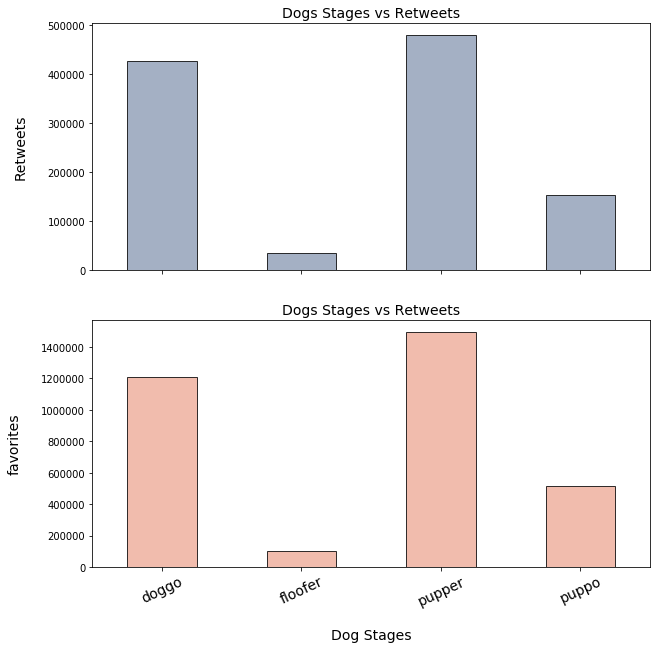

In [131]:
sum_retweets = df_master.groupby('dog_stage')['retweets'].sum()
sum_favorites = df_master.groupby('dog_stage')['favorites'].sum()

plt.subplot(2,1,1) 
stages_graph = sum_retweets.plot(kind='bar', figsize=(10, 10), alpha=0.8, color='#8d9db6' ,edgecolor='black')
stages_graph.set_title('Dogs Stages vs Retweets', size = 14)
stages_graph.set_xlabel('')
stages_graph.set_ylabel('Retweets', size = 14, labelpad=20)
stages_graph.set_xticklabels([], size = 14, rotation = 25)
rate_graph.grid(True, which='major', color='gray', alpha=0.1);

plt.subplot(2,1,2) 
stages_graph = sum_favorites.plot(kind='bar', figsize=(10, 10), alpha=0.8, color='#eeac99' ,edgecolor='black')
stages_graph.set_title('Dogs Stages vs Retweets', size = 14)
stages_graph.set_xlabel('Dog Stages', size = 14, labelpad=20)
stages_graph.set_ylabel('favorites', size = 14, labelpad=20)
stages_graph.set_xticklabels(['doggo','floofer','pupper','puppo'], size = 14, rotation = 25)
rate_graph.grid(True, which='major', color='gray', alpha=0.1);

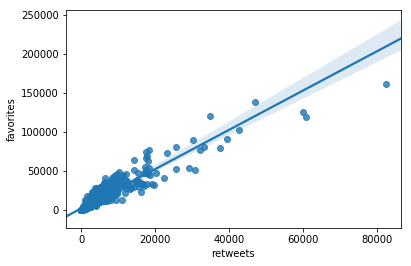

In [153]:
sns.regplot(x="retweets", y="favorites", data=df_master);

## Project's Insights

**#1#** Funny fact: Most of the dogs in this study have +10/10 rates :) 
* Rates Mean: 10.05/10
* Rates Median: 11/10
* Rates Max: 14/10
* Rates Min: 1/10

**#2#** The most favorited Dog Stage is (Pupper) stage, which has both the hights retweet and favorites rates. This stage is followed by Doggo, Puppo and finally Floofer stages. 

**#3#** More retweets rate indicates more faviorate rate. 